# Lesson 4.5: Data modeling for accuracy

### Lesson Duration: 3 hours

> Purpose: The purpose of this lesson is to apply different models on the same data and compare the accuracies to select the best performing model. We will also talk a bit more in detail about different measures of accuracies for regression models and check how they are implemented in Python.

<!-- 🚨🚨🚨 @himanshu: do we need both unit4.csv and lesson_4.05_data.csv? it is confusing that notebook is using unit4.csv and the code example in lesson.md is using the other file.  -->

### Setup

- All previous set up

### Learning Objectives

After this lesson, students will be able to:

- Implement `KNN` (_k nearest neighbor_ algorithm)
- Choose the best value of `k` for the `KNN`
- Understand different measures of accuracies for regression models
- Compare linear regression and `KNN` models and select better performing model

---

### Lesson 1 key concepts

> :clock10: 20 min

- Final preparation of data for fitting the model

      - Putting numerical and categorical encoded data together
      - Train test split

- Revisit `KNN`
- Implement `KNN`

Code Sample:

https://medium.com/swlh/k-nearest-neighbor-ca2593d7a3c4#:~:text=K%2Dnearest%20neighbors%20(KNN),closet%20to%20the%20test%20data.

In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('./files_for_lesson_and_activities/lesson_4.05_data.csv') # this file is in files_for_lesson_and_activities folder

In [3]:
numericals = data.select_dtypes(np.number)
categoricals = data.select_dtypes(np.object)

C:\Users\EB885UN\AppData\Local\Temp\ipykernel_31304\1065154470.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categoricals = data.select_dtypes(np.object)


In [4]:
numericals.head(1)

,HV1,IC1,IC5,CARDPROM,NUMPRM12,NGIFTALL,TIMELAG,year,RFA_frequency,AVGGIFT
0,479,307,12883,27,14,31,4.0,37.0,4,7.741935


In [5]:
y = numericals['AVGGIFT']
numericals = numericals.drop('AVGGIFT', axis=1)

In [6]:
categoricals.head(1)

,GENDER,HOMEOWNR,DOMAIN_letters,RFA_monetary
0,F,other,T,E


In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [8]:
transformer = StandardScaler().fit(numericals)
x_standardized = transformer.transform(numericals)

In [9]:
encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(categoricals)
encoded = encoder.transform(categoricals).toarray()

In [10]:
X = np.concatenate((x_standardized, encoded), axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=100)

In [11]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=4)
model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=4)

In [12]:
predictions = model.predict(X_test)

In [13]:
score_knn = model.score(X_test, y_test)

In [14]:
score_knn

0.21818365133023454

# 4.05 Activity 1

Refer to the `files_for_activities/lesson_4.05_data.csv` file.

1. Fit a linear regression model on the same processed data. Note we have already performed basic cleaning operations, data preprocessing - scaling and encoding, and then the train test split. Fit the model on the training data directly.
2. Find the accuracy of the model using the test data.
3. Compare the accuracies of linear regression and the `KNN` model.

### Solution

In [15]:
from sklearn import linear_model
from sklearn.metrics import r2_score

lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)

#para hacer el predict hay que hacer antes el fit (entreno). Si no entreno no hay predict que valga
predictions = lm.predict(X_test)

r2_score(y_test, predictions)

0.4740230878370695

### Lesson 2 key concepts

> :clock10: 20 min

- Choosing the best value of `k` for the `KNN`

Code Sample: 

In [16]:
from sklearn.neighbors import KNeighborsRegressor
from tqdm import tqdm
scores = []
for k in tqdm(range(5,14)):
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [08:20<00:00, 55.58s/it]


In [17]:
import matplotlib.pylab as plt

NameError: name 'plt' is not defined

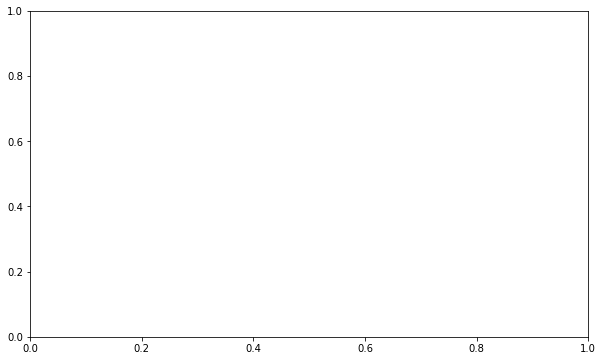

In [18]:
plt.figure(figsize=(10,6))
plt.plot(range(5,14),scores,color = 'blue', linestyle='dashed',
         marker='o', markerfacecolor='red', markersize=10)
plt.title('accuracy scores vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')

In [ ]:
scores[-1]

# ~~4.05 Activity 2~~

If you think a little bit about it, the number of neighbors might be very important for our results, but will it be the only parameter that matters? Go to the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) and check the parameters and the values they can take, pick the one you think is more relevant and change its value in the model.
**Hint**: If `K` (number of neighbors) is the most important one, maybe we could measure the way these `K` instances affect our prediction.

### Lesson 3 key concepts (ppt added)

> :clock10: 20 min

- [**SLIDES**](https://docs.google.com/presentation/d/1REBc9LkwY1lopuMeeG7nOgJh5yqTxWJh04rCov80qmM/edit?usp=sharing)

- Bias
- Variance
- Bias/Variance trade-off
- Over-fitting vs. under-fitting
- Discussion on Over-fitted models vs. under-fitted models

      - How they can impact the predictions

Description:

- **Bias** - When we say that a measurement is unbiased, we mean that the average of a large set of observations will be close to the true value.

- **Variance** is a measurement of the spread between numbers in a data set.

# ~~4.05 Activity 3~~

Let's visualize how `KNN` actually works. First of all install the [`mlxtend` library](http://rasbt.github.io/mlxtend/) and create a dataframe containing the two most relevant **numerical** variables and the target, in **that order**. Once you have done it sample it with `n = 100`, introduce that sample into this function with an arbitrary `k`:

```python
def knn_comparison(data, k):
    x = data.iloc[:, 0:2].values
    y = data.iloc[:, -1].astype(int).values
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(x, y)

    plt.figure(figsize=(16,12))
    plot_decision_regions(x, y, clf=knn)
    plt.title("Knn with K="+ str(k), fontsize = 18)
    plt.show()
```

- What can you see in the plot? Now try to create a function `plot_knn_boundaries` to loop over the previous function and iterate over the `ks = [1, 3, 5, 10, 25, 50]`. And now, _can you tell the difference between the plots_?

### Solution

conda install -c conda-forge mlxtend

`ó`

pip install mlxtend

In [ ]:
numericals.head(1)

In [ ]:
data_knn = numericals[["HV1", "NGIFTALL"]]

In [ ]:
data_knn.loc[:, 'AVGGIFT'] = y.to_list()

In [ ]:
data_knn.head(1)

In [ ]:
from mlxtend.plotting import plot_decision_regions
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pylab as plt
from tqdm import tqdm

In [ ]:
def knn_comparison(data, k):
    x = data.iloc[:, 0:2].values
    y = data.iloc[:, -1].astype(int).values
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(x, y)

    plt.figure(figsize=(16,12))
    plot_decision_regions(x, y, clf=knn)
    plt.title("Knn with K="+ str(k), fontsize = 18)
    plt.show()

In [ ]:
def plot_knn_boundaries(data, ks = [1, 3, 5, 10, 25, 50]):
    for i in tqdm(ks):
        knn_comparison(data, i)

In [ ]:
data_knn = data_knn.sample(n=100)

In [ ]:
plot_knn_boundaries(data_knn, ks = [1, 3, 5, 10, 25, 50])

- The lower the number of `k` the more over-fitted it will be. We can see that with `k = 1`, the boundaries are very clear and as we increase `k` the plots start turning very messy until the last two plots, where it is oversimplified.

### Lesson 4 key concepts

> :clock10: 20 min

- Measures of accuracies for regression models

      - `MAE` (Mean Absolute Error)
      - `MSE` (Mean Square Errors) and `RMSE` (Root Mean Square Errors)
      - `R` square
      - Adjusted `R` square

Note: Adding more features to the model might tend to increase the `r` square even if the features are not significant while the same doesn't happen with adjusted `r` square. Adding insignificant features to the model might also lead to over-fitting.

Discussion:

- In regression problems, we measure the accuracy of an algorithm based on how far away the values that the algorithm predicts are from the true values.

![Measure of Accuracy](https://education-team-2020.s3-eu-west-1.amazonaws.com/data-analytics/4.5-measures_of_accuracies.png)

Code Sample: `MAE`

The **mean absolute error** is the average (_mean_) of the absolute value of the distance between predicted and actual values. It is a measure of absolute error: because of this, we do not know if the algorithm is overestimating or underestimating when it is incorrect. Also because of the absolute value, it is not very sensitive to outliers, comparatively to other metrics.

from sklearn.metrics import mean_absolute_error
score = mean_absolute_error(actual_values, predictions)

Code Sample: `MSE` 

The **`MSE`** takes the difference between the predicted value and the actual value, squares it, then takes the average (_mean_) of those values.

In [ ]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
predictions  = lm.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(y_test, predictions)

Code Sample: RMSE

The **`RMSE`** is the square root of the _mean square error_.

In [ ]:
import math
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predictions)
rmse = math.sqrt(mse)

In [ ]:
rmse

Code Sample: `R` square

The **`R-squared`** is the proportion of the variance in the model predictions that is predictable based on the input values. Practically, it is a measure of how likely future samples are to be predicted accurately by the model.
Adding more independent variables to a regression model tends to increase the `R-squared` value, which might give us a false idea about the accuracy of the model. This would also lead to over-fitting and can return an unwarranted high `R-squared` value.

In [ ]:
from sklearn.metrics import r2_score
r_squared = r2_score(y_test, predictions)

In [ ]:
r_squared

Discussion: `Adjusted R square`

We use the **adjusted R-squared** to compare regression models that contain different numbers of independent variables. For example, there is a model with 10 variables and the other model has 20 variables. The model with 20 variables will give a larger R square but does that really mean that this model is better than the other model. We can't say it for sure. For this, we use adjusted the `r` square.

Adjusted `r` square adjusts for the number of terms in the model. Its value increases only when the new term improves the model fit while it decreases when the term doesn't improve the model fit by a sufficient amount.

![Adjusted R square](https://education-team-2020.s3-eu-west-1.amazonaws.com/data-analytics/4.5-adjusted_r_square.gif)

Code Sample: Adjusted R square

In [ ]:
score = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

In [ ]:
score

# 4.05 Activity 4

- From all the regression metrics we have seen, which one do you think is the one to use in most cases?
- Calculate and plot `R2`, `MSE`, `RMSE`, and `MAE`.

### Solution

We have seen **R2**, **MSE**, **RMSE** and **MAE**. Of course, there is not a magic solution for which you should always use it, but there are some details worth knowing:

- **R2** is scaled, which means that it is independent of the data. This one would be the one to go with if we don't know a lot about the data and general information about our model. However, it can be misleading, as it is supposed to be between **0** and **1** but sometimes **it is not** (you can read about it [here](http://www.fairlynerdy.com/what-is-r-squared/). In fact, **R2** is a **biased** estimator (more information [here](https://statisticsbyjim.com/regression/r-squared-too-high/#:~:text=Reason%201%3A%20R-squared%20is%20a%20biased%20estimate&text=In%20statistics%2C%20a%20biased%20estimator,use%20adjusted%20R2%20instead).

- **MAE** would be the _median_ of the regression metrics as what it measures is the sum of distances between predicted and real values (errors), and that won't give a special treat to really bad predictions, so if that's what we want this metric should do great.

  - _MSE_ - It is the mean of the squared distance of the errors, which will weight the bad predictions.
  - _RMSE_ - Root _MSE_, essentially it is the same but it is easier to understand within the data context

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=100)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2:', metrics.r2_score(y_test, y_pred))
print('Adjusted R:',  1 - (1-metrics.r2_score(y_test, y_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

# Lab | Comparing regression models


For this lab, we will be using the same dataset we used in the previous labs. We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs. 

### Instructions

1. In this final lab, we will model our data. Import sklearn `train_test_split` and separate the data.
2. Try a simple linear regression with all the data to see whether we are getting good results.
3. Great! Now define a function that takes a list of models and train (and tests) them so we can try a lot of them without repeating code.
4. Use the function to check `LinearRegressor` and `KNeighborsRegressor`.
5. You can check also the `MLPRegressor` for this task!
6. Check and discuss the results.

```python
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(final_df.drop(columns = "total_claim_amount"),
                                                    final_df.total_claim_amount, test_size = 0.2)
```

```python
LR = LinearRegression()
LR.fit(X_train, y_train)
LR.score(X_test, y_test)
```

```python
def models_automation(models, X_train, y_train, X_test, y_test):
    for model in models:
        model.fit(X_train, y_train)
        print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")

linear_models = [LinearRegression(), Lasso(), Ridge(), ElasticNet()]
models_automation(linear_models, X_train, y_train) 
```

```python
from sklearn.neighbors import KNeighborsRegressor
knnr = [KNeighborsRegressor(5)]
models_automation([knnr], X_train, y_train)
```

```python
from sklearn.neural_network import MLPRegressor
mlpr = [MLPRegressor(max_iter = 1000)]
models_automation([mlpr], X_train, y_train)
```

### Additional Resources

- [Choosing the correct regression analysis method](https://statisticsbyjim.com/regression/choosing-regression-analysis/)
- [Continuous, discrete and categorical variables](https://support.minitab.com/en-us/minitab-express/1/help-and-how-to/modeling-statistics/regression/supporting-topics/basics/what-are-categorical-discrete-and-continuous-variables/)